In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_kick = pd.read_csv("data/car_kick.csv")

In [3]:
car_kick.head()

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,Class
0,1.289952e+09,2006.0,4,51954.0,6197.0,7062.0,9605.0,10426.0,5341.0,6351.0,...,2.0,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1.242691e+09,2005.0,4,89127.0,3688.0,4783.0,4483.0,5666.0,3688.0,4783.0,...,2.0,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1.248221e+09,2006.0,3,71271.0,6897.0,8449.0,7949.0,9625.0,6868.0,8549.0,...,1.0,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1.285718e+09,2008.0,2,83338.0,7878.0,8925.0,11723.0,13026.0,7801.0,8704.0,...,2.0,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1.237334e+09,2007.0,2,58698.0,8800.0,10091.0,10004.0,11398.0,7355.0,8543.0,...,1.0,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0


In [4]:
car_kick.columns

Index(['PurchDate', 'VehYear', 'VehicleAge', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'WarrantyCost', 'Auction', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'BYRNO', 'VNZIP1',
       'VNST', 'IsOnlineSale', 'Class'],
      dtype='object')

# Class - Class of the car (target variable)

<AxesSubplot:title={'center':'Class- Class of the car (Target Variable)'}, ylabel='Class'>

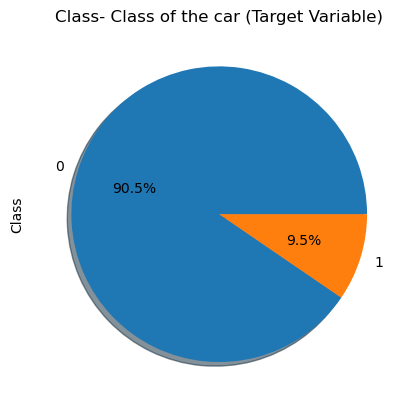

In [5]:
car_kick['Class'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, title="Class- Class of the car (Target Variable)")

In [6]:
#The dataset is imbalanced

# PurchDate - Purchase Date

In [7]:
car_kick['PurchDate'] =  pd.to_datetime(car_kick['PurchDate']) 

In [8]:
def from_dob_to_age(purchase_date):
    today = datetime.date.today()
    if (purchase_date.year > today.year):
        return today.year - (purchase_date.year-100) - ((today.month, today.day) < (purchase_date.month, purchase_date.day))
    return today.year - purchase_date.year - ((today.month, today.day) < (purchase_date.month, purchase_date.day))

In [9]:
car_kick['PurchAge'] = car_kick['PurchDate'].apply(lambda x: from_dob_to_age(x))

In [10]:
car_kick.head()

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,Class,PurchAge
0,1970-01-01 00:00:01.289952000,2006.0,4,51954.0,6197.0,7062.0,9605.0,10426.0,5341.0,6351.0,...,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0,53
1,1970-01-01 00:00:01.242691200,2005.0,4,89127.0,3688.0,4783.0,4483.0,5666.0,3688.0,4783.0,...,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0,53
2,1970-01-01 00:00:01.248220800,2006.0,3,71271.0,6897.0,8449.0,7949.0,9625.0,6868.0,8549.0,...,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0,53
3,1970-01-01 00:00:01.285718400,2008.0,2,83338.0,7878.0,8925.0,11723.0,13026.0,7801.0,8704.0,...,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0,53
4,1970-01-01 00:00:01.237334400,2007.0,2,58698.0,8800.0,10091.0,10004.0,11398.0,7355.0,8543.0,...,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0,53


In [11]:
#I'll drop the values beacuse they are irrelevant now
car_kick = car_kick.drop(['PurchDate'], axis=1)

In [12]:
car_kick['PurchAge'].unique()

array([53])

In [13]:
#We can drop the value, because all data if from the same year
#I'll drop the values beacuse they are irrelevant now
car_kick = car_kick.drop(['PurchAge'], axis=1)

# VehYear - Year the car was produced

In [14]:
print(type(car_kick.VehYear[0]))
print(car_kick.VehYear[0])

<class 'numpy.float64'>
2006.0


In [15]:
def distplot_mean_median(column, title = ""):
    
    mean=column.mean()
    median=column.median()
    #mode=column.mode().get_values()[0]
    fig = plt.figure(figsize=(5,1))
    ax = fig.add_subplot(111)
    sns.boxplot(column)
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='b', linestyle='-')
    #ax_box.axvline(mode, color='b', linestyle='-')
    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    #ax.set_facecolor((0,0,0.10))
    s = sns.distplot(column)
    plt.axvline(mean, color='red', linewidth=1.5, label="mean")
    plt.axvline(median, color='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


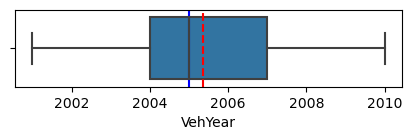

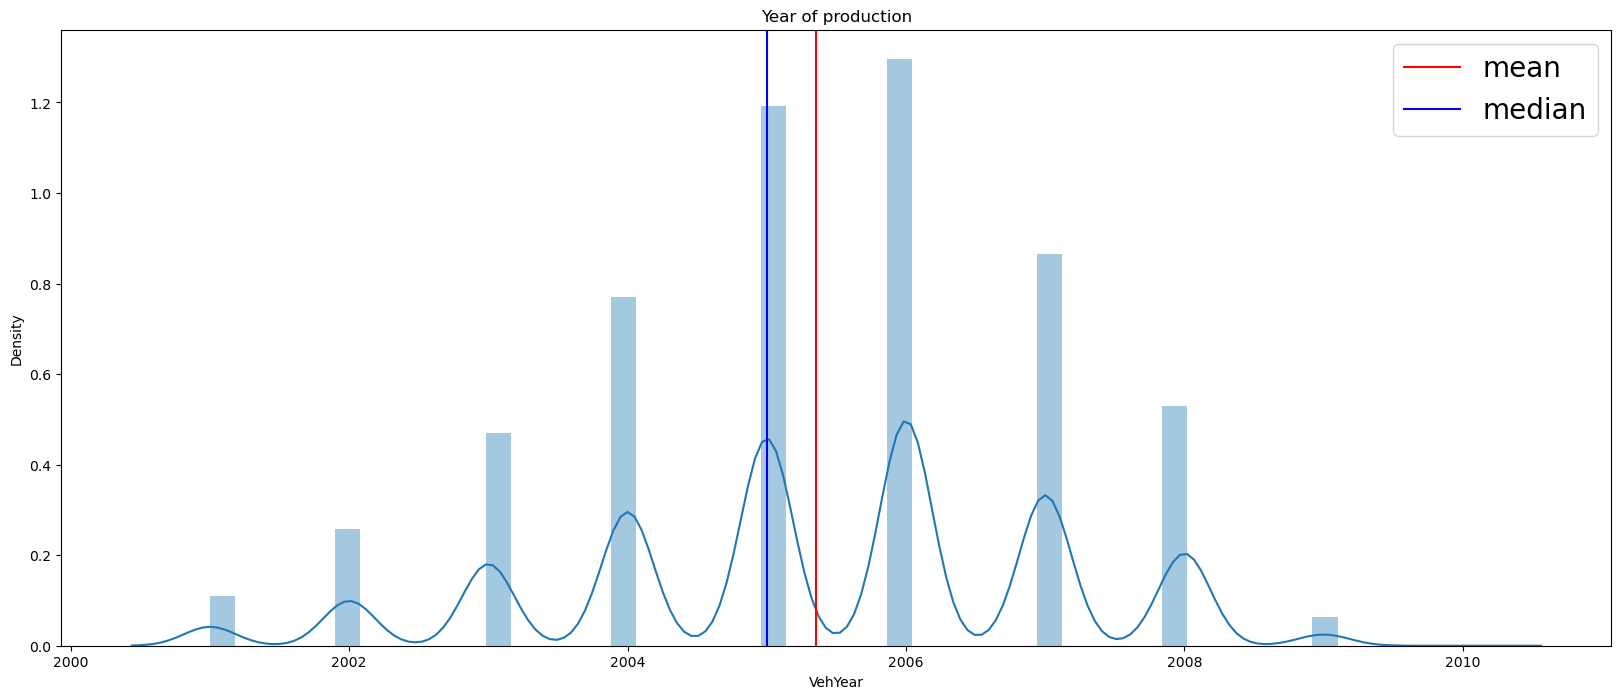

In [16]:
car_kick['VehYear'] = car_kick['VehYear'].astype(int)
distplot_mean_median(column=car_kick['VehYear'], title="Year of production")

In [17]:
#I will change the date to age of the car
car_kick['VehAge'] = car_kick['VehYear'].apply(lambda x: int(datetime.date.today().year) - x)

In [18]:
#And I will drop no longer needed cathegory
car_kick = car_kick.drop(['VehYear'], axis=1)

In [19]:
# VehicleAge - Age of the car

In [22]:
car_kick.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,Class,VehAge
0,4,51954.0,6197.0,7062.0,9605.0,10426.0,5341.0,6351.0,8513.0,9822.0,...,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0,17
1,4,89127.0,3688.0,4783.0,4483.0,5666.0,3688.0,4783.0,4483.0,5666.0,...,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0,18
2,3,71271.0,6897.0,8449.0,7949.0,9625.0,6868.0,8549.0,7917.0,9733.0,...,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0,17
3,2,83338.0,7878.0,8925.0,11723.0,13026.0,7801.0,8704.0,11995.0,12901.0,...,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0,15
4,2,58698.0,8800.0,10091.0,10004.0,11398.0,7355.0,8543.0,8443.0,9726.0,...,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0,16


In [21]:
#check is Vehicle age equal to new category VehAge
car_kick[['VehAge', 'VehicleAge']]

,VehAge,VehicleAge
0,17,4
1,18,4
2,17,3
3,15,2
4,16,2
...,...,...
67206,15,2
67207,19,6
67208,19,6
67209,20,7


#### these dates don't match, it's good to keep that in mind

# VehOdo - How far the car has driven in km

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


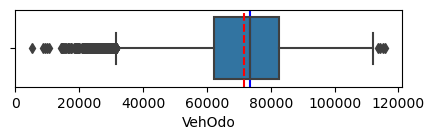

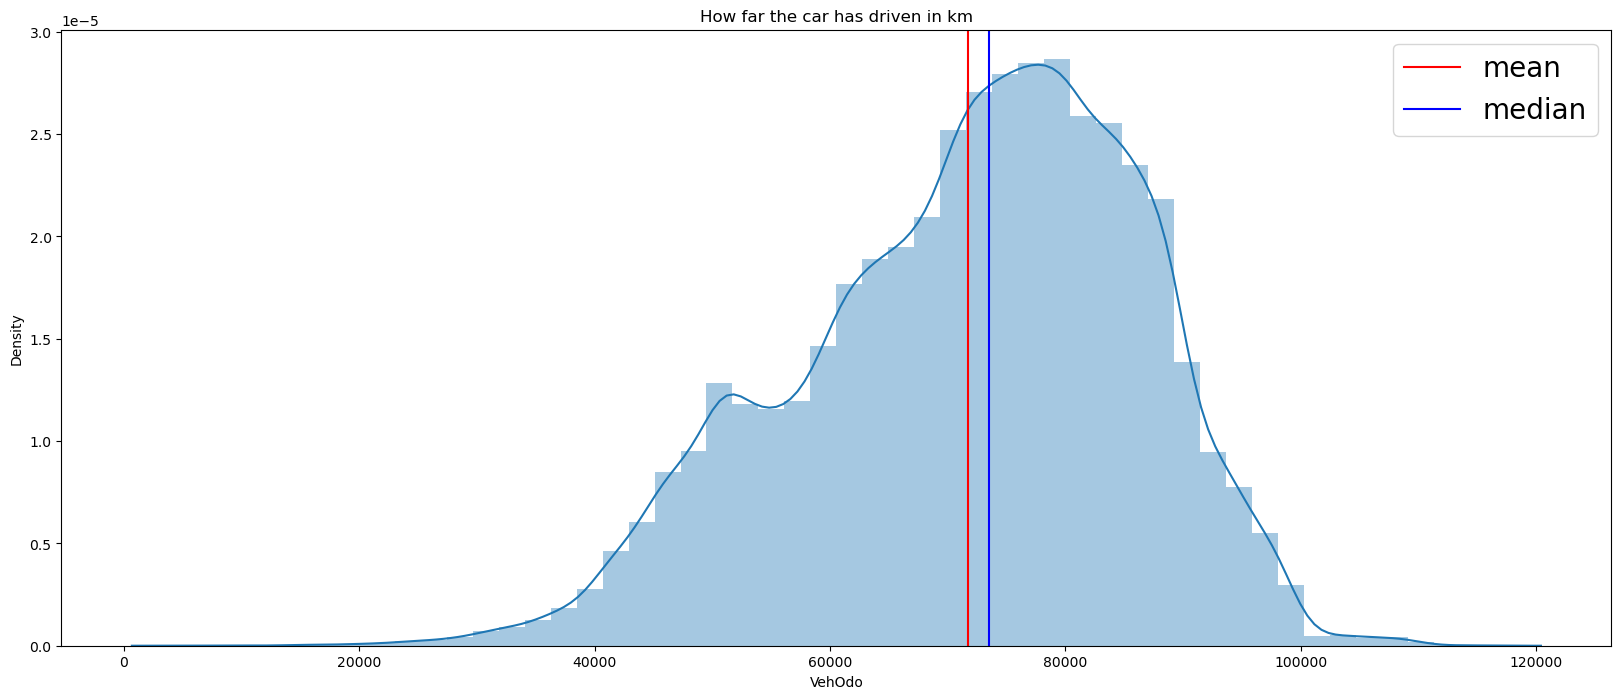

In [24]:
car_kick['VehOdo'] = car_kick['VehOdo'].astype(int)
distplot_mean_median(column=car_kick['VehOdo'], title="How far the car has driven in km")

# MMRAcquisitionAuctionAveragePrice - Price of the car when is was bought at auction, average

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


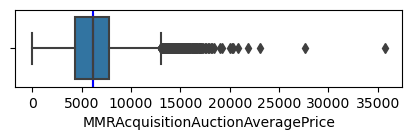

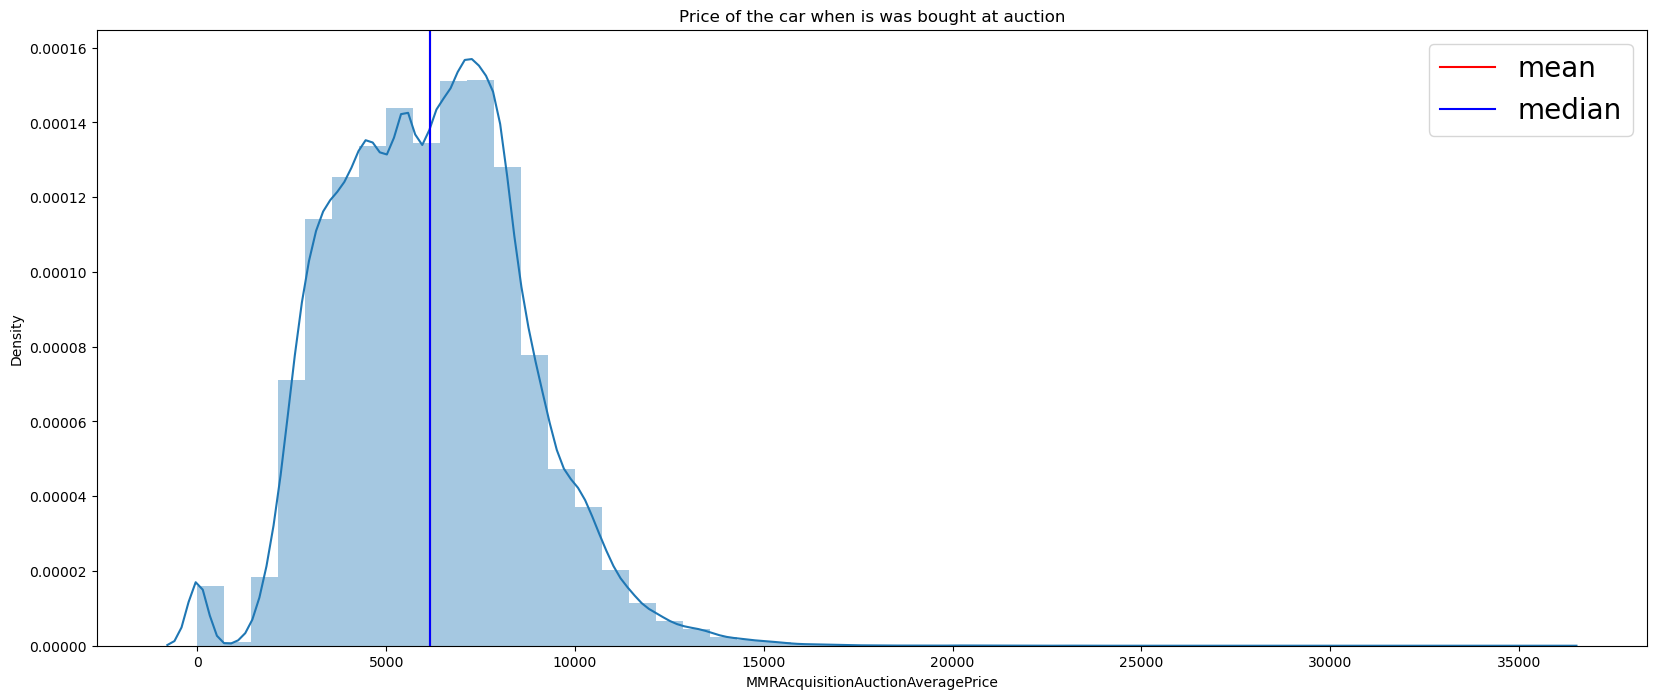

In [25]:
distplot_mean_median(column=car_kick['MMRAcquisitionAuctionAveragePrice'], title="Price of the car when is was bought at auction")

# MMRAcquisitionAuctionCleanPrice - Price of the car when it was bought at auction, before fees

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


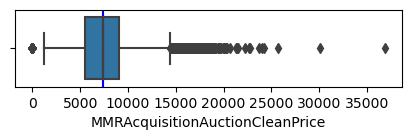

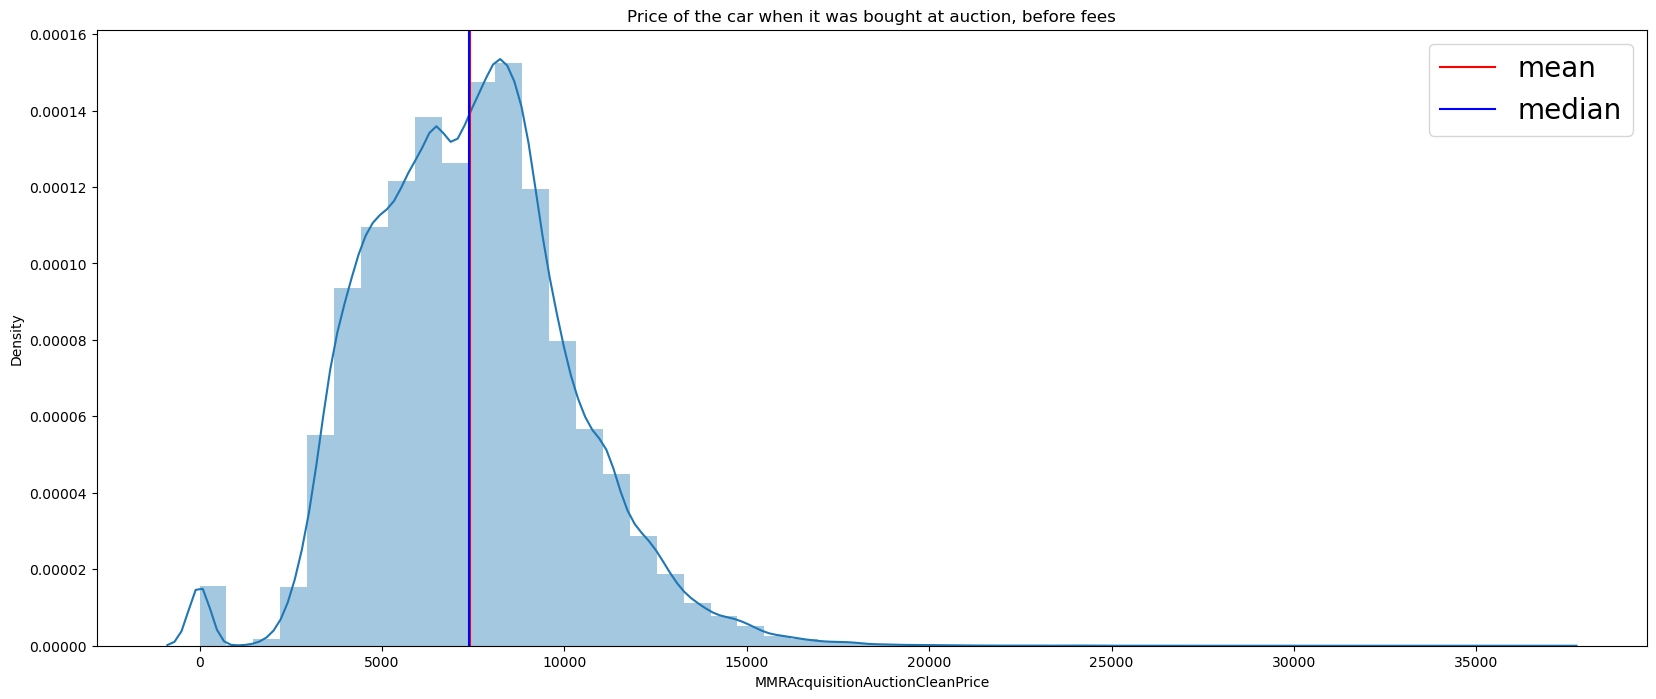

In [26]:
distplot_mean_median(column=car_kick['MMRAcquisitionAuctionCleanPrice'], title="Price of the car when it was bought at auction, before fees")

# MMRAcquisitionRetailAveragePrice - Price of the car when is was bought in a retail store, average

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


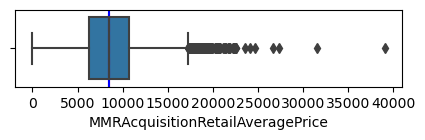

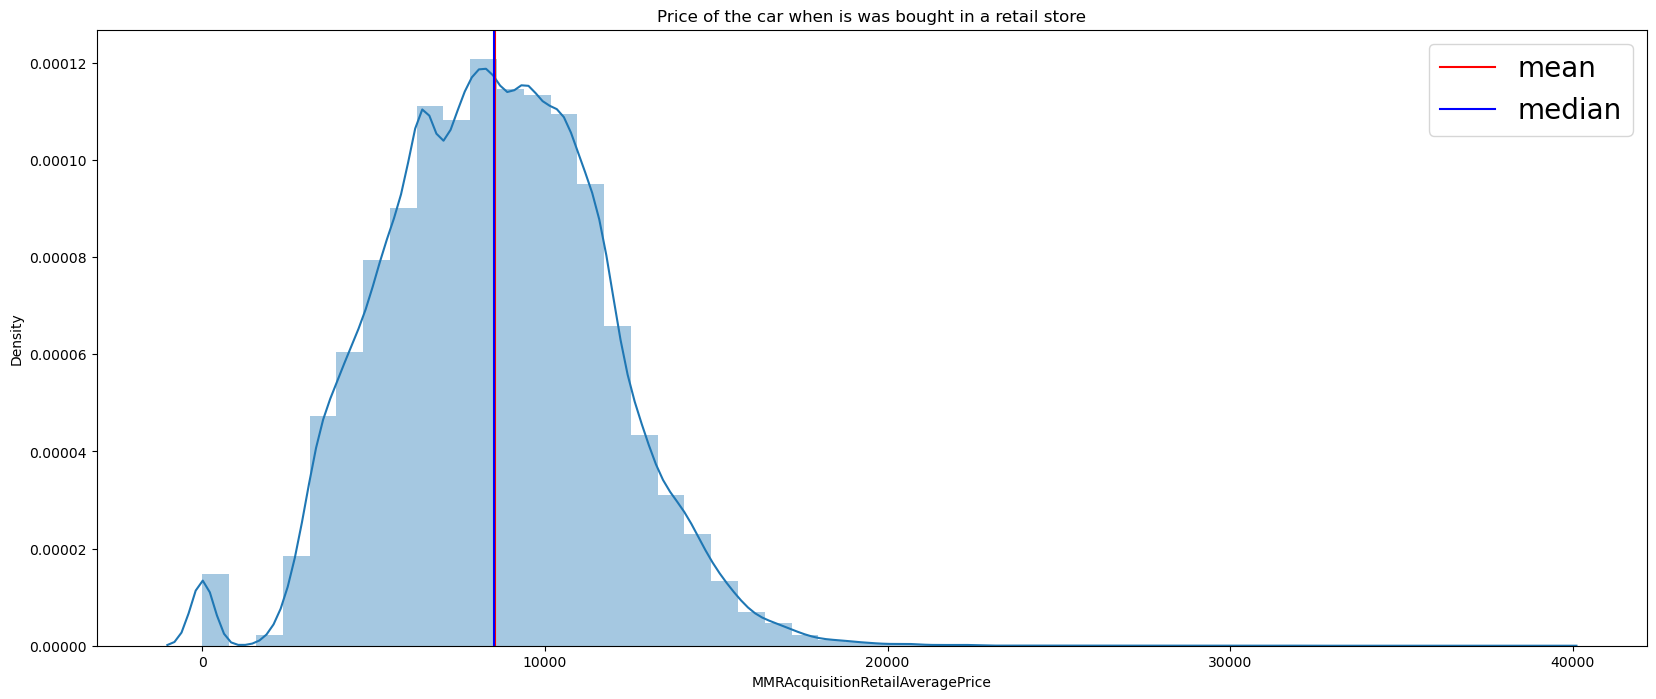

In [27]:
distplot_mean_median(column=car_kick['MMRAcquisitionRetailAveragePrice'], title="Price of the car when is was bought in a retail store")

# MMRCurrentAuctionAveragePrice - Current price of the car at auction, average

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


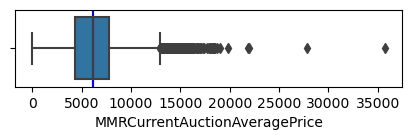

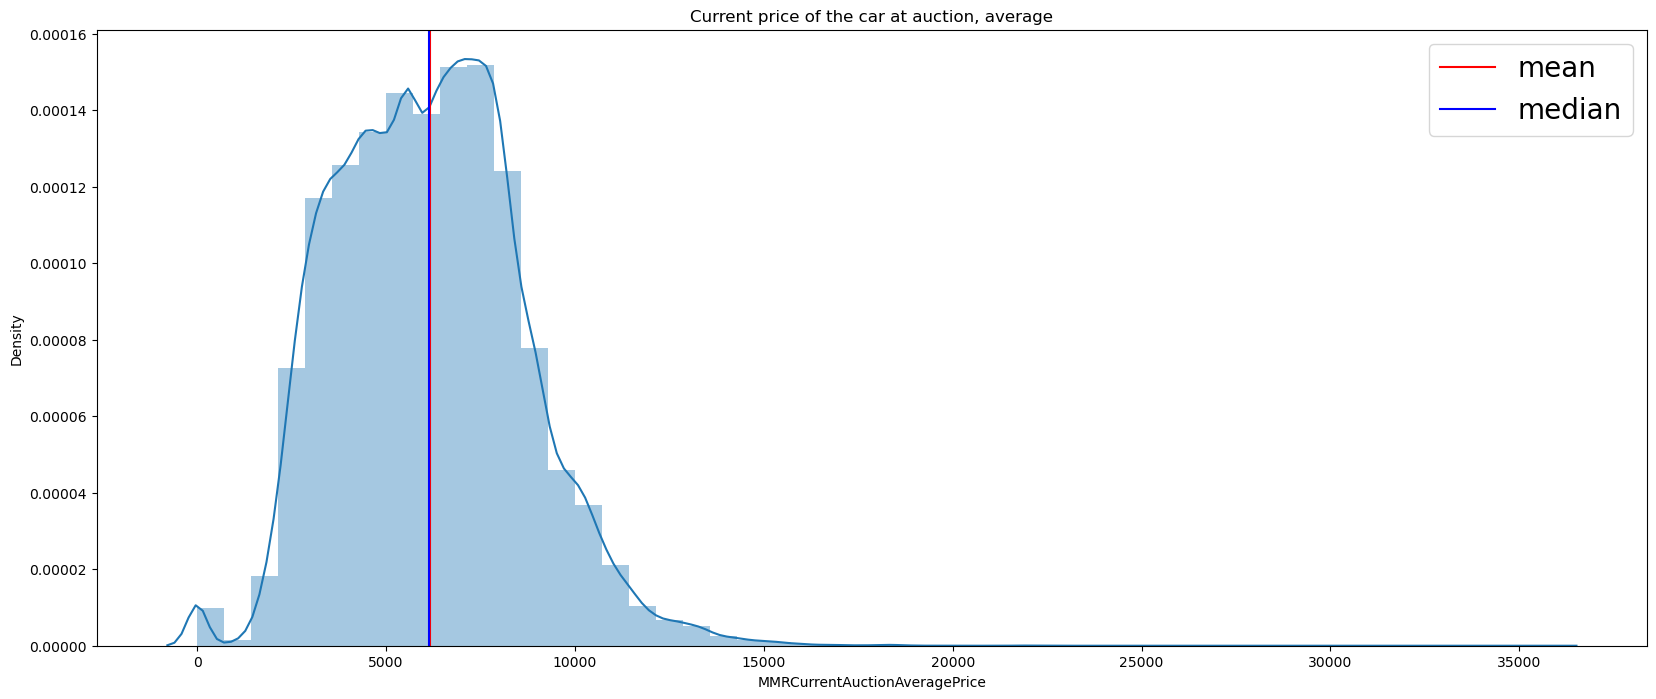

In [28]:
distplot_mean_median(column=car_kick['MMRCurrentAuctionAveragePrice'], title="Current price of the car at auction, average")

# MMRCurrentRetailAveragePrice - Current price of the car at a retail store, average

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


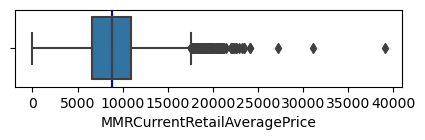

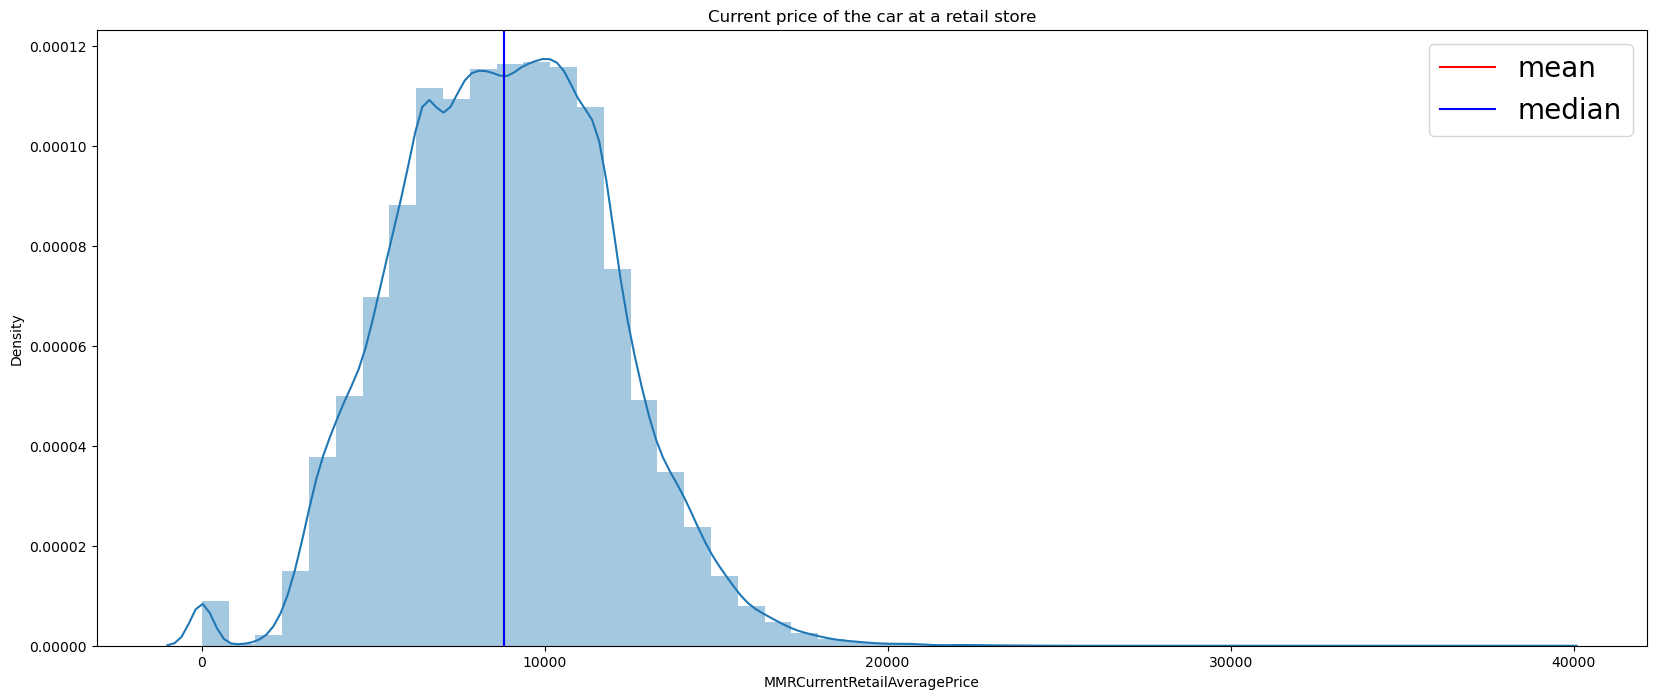

In [29]:
distplot_mean_median(column=car_kick['MMRCurrentRetailAveragePrice'], title="Current price of the car at a retail store")

# VehBCost - B price of the car

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


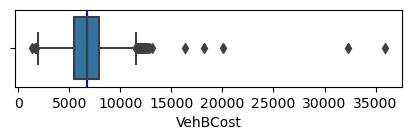

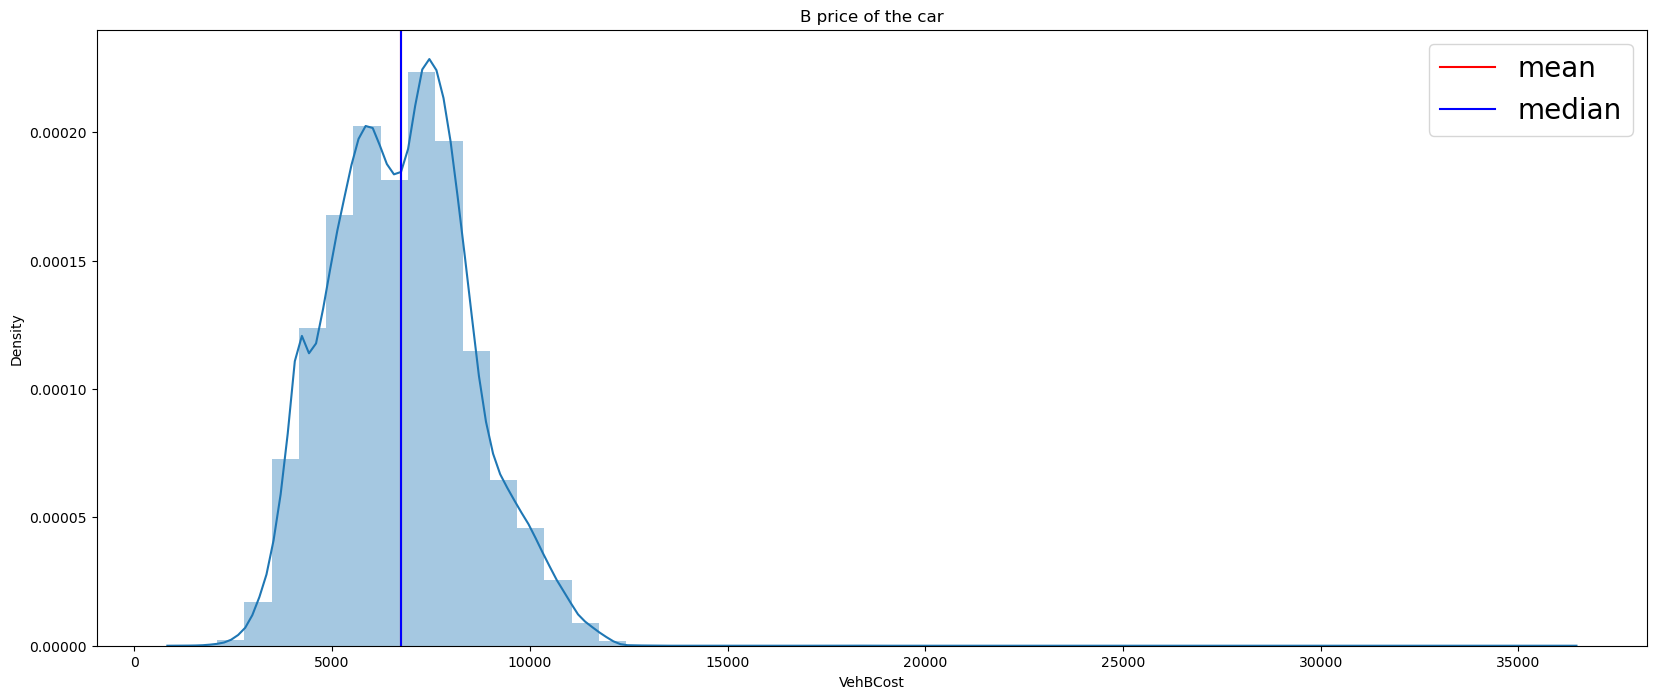

In [30]:
distplot_mean_median(column=car_kick['VehBCost'], title="B price of the car")

In [ ]:
# WarrantyCost - Cost of car warranty

In [ ]:
# Auction - Location of auction

In [ ]:
#Make - Producer of the car

In [ ]:
#Model - Model of the car

In [ ]:
# Trim - Trim level of the car

In [ ]:
# SubModel - Submodel of the car

In [ ]:
# Color - Color of the car

In [ ]:
# Transmission - Type of transmission in the car

In [ ]:
# WheelTypeID - ID of the wheelID

In [ ]:
# WheelType - Type of wheel

In [ ]:
# Nationality - Nationality of the car

In [ ]:
# Size - Size of the car

In [ ]:
# TopThreeAmericanName -Whether the car is from one of the three largest manufacturers in America

In [ ]:
# BYRNO -Car registration number

In [ ]:
# VNZIP1 - Car ZIP number

In [ ]:
# VNST - Car navigation system

In [ ]:
# IsOnlineSale - Whether the sale was online or not